## Home Work

In [14]:
import colorama

import tqdm
import matplotlib.pyplot as plt
import graphviz
import numpy as np
import Frozen_Lake as fl

In [2]:
def init_policy(env):

    actions_set = set()

    row_max = 0
    col_max = 0
    for state in env.get_all_states():
        actions_set.update(env.get_possible_actions(state))
        row_max = max(row_max, state[0])
        col_max = max(col_max, state[1])

    actions = {i:action for i,action in enumerate(sorted(actions_set))}

    policy = np.zeros((row_max+1, col_max+1, len(actions_set)))

#     print('policies    |states')
    for y,x in env.get_all_states():
        possible_actions = env.get_possible_actions((y,x))
        if len(possible_actions)!=0:
            uniform_prob = 1/len(possible_actions)
            policy[y][x] = uniform_prob
#         print(policy[y][x], y, x,)
    return policy, list(sorted(actions_set))

def init_values(policy):
     return np.zeros((policy.shape[0]*policy.shape[1],))

def policy_evaluation_step(policy, values, gamma):
    new_values = np.zeros(policy.shape[0]*policy.shape[1])

    for state in env.get_all_states():
        state_y, state_x = state
        idx_state_values = state_y*policy.shape[0] + state_x
        for action in env.get_possible_actions(state):
            policy_prob = policy[state_y][state_x][actions_dict[action]]
            for next_state in env.get_next_states(state, action):
                next_state_y, next_state_x = next_state
                idx_next_state_values = next_state_y*policy.shape[0] + next_state_x

                # reward
                reward = env.get_reward(state, action, next_state)
#                 total_reward += reward
                # value
                trans_prob = env.get_transition_prob(state, action, next_state)
                next_value = values[idx_next_state_values]
#                 total_value += gamma * trans_prob * value_func
                new_values[idx_state_values] += \
                    policy_prob * trans_prob * (reward + gamma * next_value)
#             new_values[idx_state_values] += \
#                 policy_prob * (total_reward + total_value)

    return new_values

def Q(policy, values, actions_dict):
    new_q = np.zeros(policy.shape)

    for state in env.get_all_states():
        state_y, state_x = state
        # actions_dict[action]
        for action in env.get_possible_actions(state):
            for next_state in env.get_next_states(state, action):
                next_state_y, next_state_x = next_state

                reward = env.get_reward(state, action, next_state)
                prob = env.get_transition_prob(state, action, next_state)
                next_value = values[next_state_y*policy.shape[0]+next_state_x]

                new_q[state_y][state_x][actions_dict[action]] \
                    += prob *(reward + gamma * next_value)
    return new_q

def policy_improvement(policy, q):
    next_policy = np.zeros(policy.shape)
    for state in env.get_all_states():
        state_y,state_x = state

        idx_action = np.argmax(q[state_y][state_x])
        next_policy[state_y][state_x][idx_action] = 1
    return next_policy

/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
env = fl.FrozenLakeEnv(map_name="4x4")
env.reset()

(0, 0)

In [4]:
policy,actions_set = init_policy(env)
actions_dict ={action:i for i,action in enumerate(sorted(actions_set))}
actions_arr = [0]*4
for k,v in actions_dict.items():
    actions_arr[v]=k
actions_arr, actions_dict

(['down', 'left', 'right', 'up'], {'down': 0, 'left': 1, 'right': 2, 'up': 3})

In [5]:
L = 100
K = 100
gamma = 0.8

values = init_values(policy)
for k in tqdm.tqdm(range(K), position=0):
    for l in range(L):
        values = policy_evaluation_step(policy, values, gamma)
    q = Q(policy, values, actions_dict)
    policy = policy_improvement(policy, q)
policy

100%|██████████| 100/100 [00:04<00:00, 20.92it/s]


array([[[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]]])

In [6]:
def render_policy(policy, env, actions_arr):
    field = []
    row = []
    for y, x in env.get_all_states():
        row.append(actions_arr[np.argmax(policy[x][y])][0])
        if x == 3:
            field.append(' '.join(row))
            row = []
    print('\n'.join(field))

In [7]:
render_policy(policy, env, actions_arr)

d d r d
r d d r
d d d r
l d d d


In [40]:
def run_test(policy):
    total_reward = 0
    state = env.reset()
    
    for step in range(100):
        possible_actions = list(sorted(env.get_possible_actions(state)))
        state_y, state_x = state
        actions_distr = policy[state_y][state_x]

        action = np.random.choice(possible_actions,p=actions_distr)
        state, reward, done, _ = env.step(action)
#         print(state, reward, done, _,action, actions_distr)
#         break
#         env.render()
        total_reward += reward

        if done: break
    return total_reward, step

In [42]:
def stats(g, r, s):
    sucess = np.sum(r[r==1])/len(r)
    fail = 1 - sucess
    sucess_len = np.mean(s[r==1])
    fail_len = np.mean(s[r==0])
    return g, sucess, fail, sucess_len, fail_len

In [10]:
run_test(policy)

(1.0, 7)

In [34]:
def train_MDP(L, K, gamma, tqdm_train):
    tqdm_train.reset()
    policy,actions_set = init_policy(env)
    actions_dict ={action:i for i,action in enumerate(sorted(actions_set))}
    values = init_values(policy)
    values
    for k in range(K):
        tqdm_train.update()
        for l in range(L):
            values = policy_evaluation_step(policy, values, gamma)
        q = Q(policy, values, actions_dict)
        policy = policy_improvement(policy, q)
    return policy

def test_MDP(policy, NN, tqdm_test):
    tqdm_test.reset()
    runs = []
    for _ in range(NN):
        runs.append(run_test(policy))
        tqdm_test.update()
    runs = np.array(runs)
    rewards, steps = runs[::,0], runs[::,1]
    return rewards, steps

def experiment(L, K, NN, gamma, tqdm_train, tqdm_test):
    # gamma = 0.8
    policy = train_mdp(L, K, gamma, tqdm_train)
    return test_MDP(policy, NN, tqdm_test)

In [35]:
def experiments(L, K, NN, gammas):
    exps=[]
    tqdm_gammas = tqdm.tqdm_notebook(total=len(gammas), desc='gammas', position=0)
    tqdm_train = tqdm.tqdm_notebook(total=K, desc='train', position=1)
    tqdm_test  = tqdm.tqdm_notebook(total=NN, desc='test', position=2)
    for gamma in gammas:
        tqdm_gammas.set_description('gamma:'+f"{gamma:0.5}")
        rewards, steps = experiment(L, K, NN, gamma, tqdm_train, tqdm_test)
        exps.append(stats(gamma, rewards, steps))
        tqdm_gammas.update()
    return np.array(exps)

In [101]:
gammas = np.linspace(0.01,1, num=200)

In [102]:
NN = 5000
L = 100
K = 100
exps_01_1 = experiments(L, K, NN, gammas)

/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


gammas:   0%|          | 0/200 [00:00<?, ?it/s]

train:   0%|          | 0/100 [00:00<?, ?it/s]

test:   0%|          | 0/5000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'The % of successfull trajectories vs Gamma')

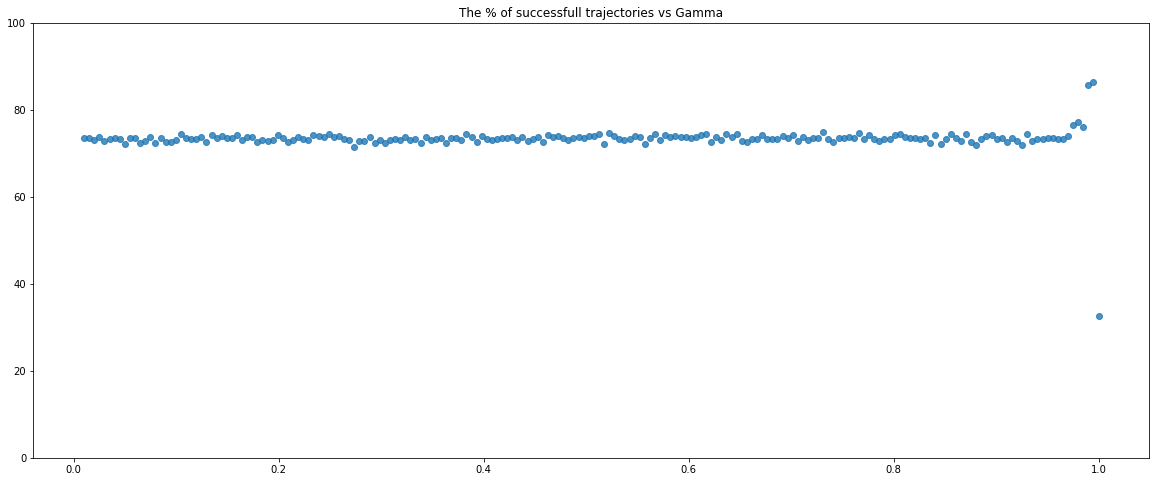

In [104]:
# g, sucess, fail, sucess_len, fail_len
plt.figure(figsize=(20,8))
plt.ylim((0,100))
plt.scatter(exps_01_1[::,0],exps_01_1[::,1]*100, alpha=0.8)
plt.title('The % of successfull trajectories vs Gamma')

In [106]:
np.mean(exps_01_1[::,1][:-6])

0.7343969072164949

Text(0.5, 1.0, 'The % of successfull trajectories vs Gamma')

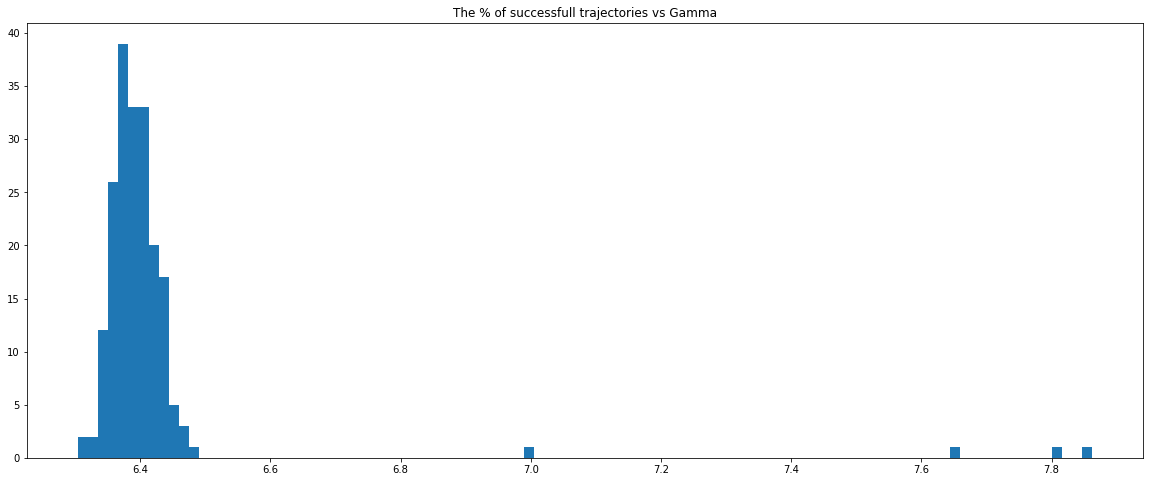

In [98]:
# g, sucess, fail, sucess_len, fail_len
plt.figure(figsize=(20,8))
# plt.ylim((0,100))
plt.hist(exps[exps[::,3]<18][::,3], bins=100,)
plt.title('The % of successfull trajectories vs Gamma')

In [71]:
gammas = np.linspace(0.9,0.99, num=100)
gammas

NN = 5000
L = 100
K = 100
exps_short_9_99 = experiments(L, K, NN, gammas)

/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


gammas:   0%|          | 0/100 [00:00<?, ?it/s]

train:   0%|          | 0/100 [00:00<?, ?it/s]

test:   0%|          | 0/5000 [00:00<?, ?it/s]

In [72]:
exps_short[::,1]

array([0.727 , 0.7306, 0.7398, 0.7432, 0.7406, 0.7382, 0.7248, 0.727 ,
       0.7342, 0.7294, 0.7416, 0.7306, 0.7458, 0.7322, 0.7334, 0.7306,
       0.738 , 0.7288, 0.725 , 0.7278, 0.7442, 0.7278, 0.7378, 0.7258,
       0.729 , 0.735 , 0.7374, 0.7274, 0.7324, 0.7256, 0.74  , 0.7374,
       0.7316, 0.7302, 0.7274, 0.7354, 0.7356, 0.7372, 0.7382, 0.7348,
       0.7338, 0.747 , 0.742 , 0.7438, 0.7402, 0.7332, 0.7368, 0.7342,
       0.7342, 0.7386, 0.7322, 0.7384, 0.737 , 0.7356, 0.74  , 0.7334,
       0.7332, 0.7392, 0.743 , 0.7428, 0.723 , 0.7332, 0.7406, 0.734 ,
       0.729 , 0.733 , 0.7282, 0.7306, 0.7398, 0.7258, 0.7318, 0.7392,
       0.7296, 0.7304, 0.7356, 0.7338, 0.7432, 0.7322, 0.7448, 0.751 ,
       0.754 , 0.7504, 0.7674, 0.7596, 0.76  , 0.7588, 0.755 , 0.7604,
       0.7624, 0.7598, 0.7628, 0.7596, 0.768 , 0.7574, 0.754 , 0.7688,
       0.7624, 0.7598, 0.8576, 0.858 ])

In [100]:
exps_short[::,1]*100

array([85.7 , 85.64, 85.36, 85.22, 86.6 , 87.4 , 84.9 , 86.48, 85.74,
       85.78, 86.12, 85.74, 85.1 , 85.72, 85.76, 85.84, 85.5 , 85.76,
       85.7 , 85.56, 86.44, 85.16, 85.72, 85.14, 86.26, 86.34, 85.82,
       85.82, 85.66, 86.44, 85.26, 84.86, 85.52, 86.76, 86.06, 85.5 ,
       85.44, 86.02, 86.28, 85.22, 86.32, 86.22, 85.88, 85.98, 85.7 ,
       86.34, 85.56, 86.62, 85.58, 86.26, 86.18, 86.66, 85.6 , 86.32,
       86.94, 86.92, 85.8 , 86.56, 86.38, 86.06, 87.28, 86.6 , 85.02,
       86.44, 86.68, 86.28, 86.52, 86.22, 85.84, 86.6 , 85.96, 85.66,
       85.82, 85.76, 86.8 , 85.92, 87.56, 86.  , 86.3 , 86.16, 86.48,
       86.6 , 86.32, 86.74, 86.6 , 86.7 , 87.02, 85.52, 85.98, 85.82,
       51.5 , 52.1 , 52.04, 44.3 , 44.54, 46.1 , 45.2 , 45.22, 43.44,
       44.54])

/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'The % of successfull trajectories vs Gamma')

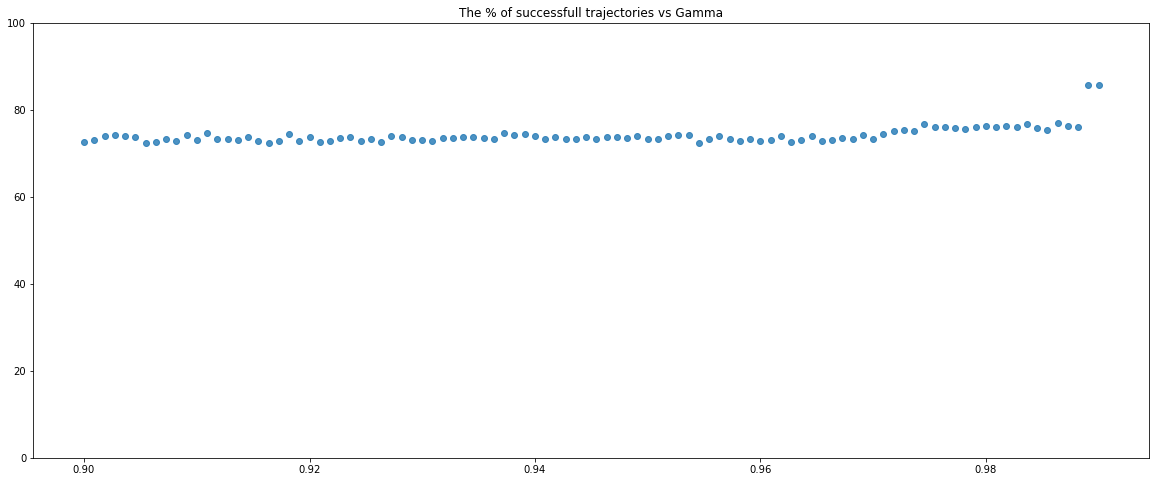

In [74]:
# g, sucess, fail, sucess_len, fail_len
plt.figure(figsize=(20,8))
plt.ylim((0,100))
plt.scatter(exps_short[::,0],exps_short[::,1]*100, alpha=0.8)
plt.title('The % of successfull trajectories vs Gamma')

In [75]:
gammas = np.linspace(0.99,0.9999, num=100)
gammas

NN = 5000
L = 100
K = 100
exps_short = experiments(L, K, NN, gammas)

/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


gammas:   0%|          | 0/100 [00:00<?, ?it/s]

train:   0%|          | 0/100 [00:00<?, ?it/s]

test:   0%|          | 0/5000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'The % of successfull trajectories vs Gamma')

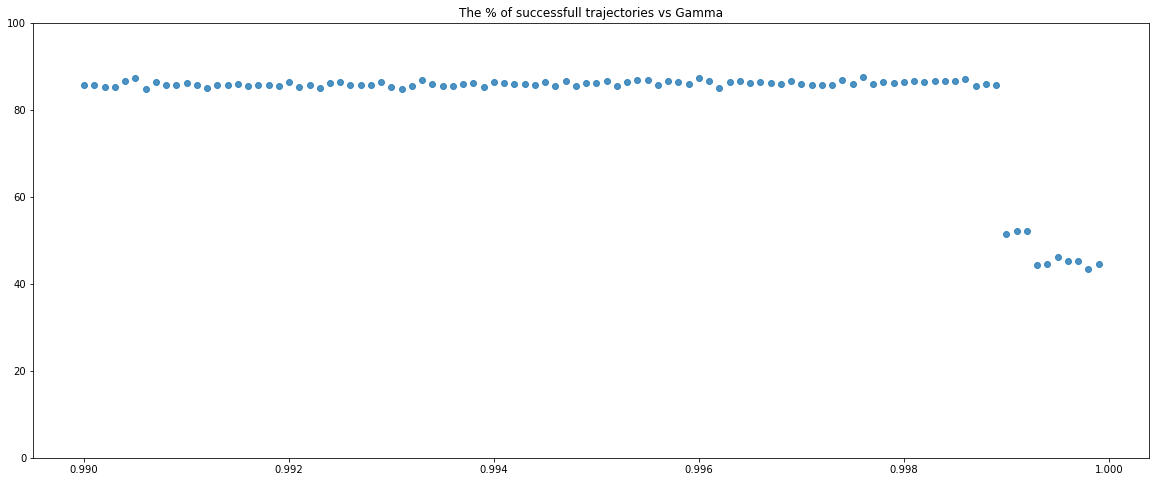

In [76]:
# g, sucess, fail, sucess_len, fail_len
plt.figure(figsize=(20,8))
plt.ylim((0,100))
plt.scatter(exps_short[::,0],exps_short[::,1]*100, alpha=0.8)
plt.title('The % of successfull trajectories vs Gamma')

In [79]:
gammas = np.linspace(0.998,0.99999, num=100)
gammas

NN = 5000
L = 100
K = 100
exps_short2 = experiments(L, K, NN, gammas)

/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


gammas:   0%|          | 0/100 [00:00<?, ?it/s]

train:   0%|          | 0/100 [00:00<?, ?it/s]

test:   0%|          | 0/5000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'The % of successfull trajectories vs Gamma')

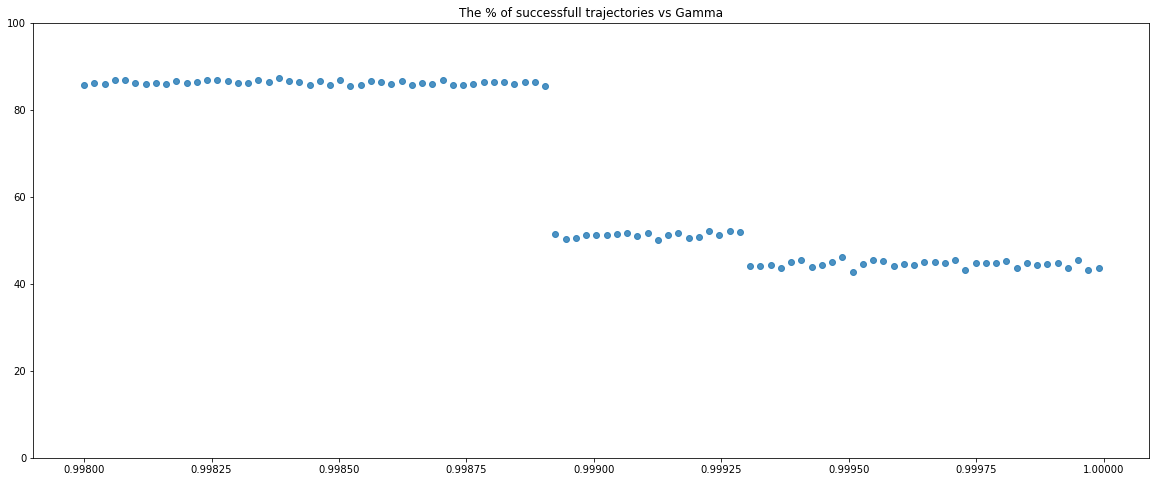

In [81]:
# g, sucess, fail, sucess_len, fail_len
plt.figure(figsize=(20,8))
plt.ylim((0,100))
plt.scatter(exps_short2[::,0],exps_short2[::,1]*100, alpha=0.8)
plt.title('The % of successfull trajectories vs Gamma')

/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'The % of successfull trajectories vs Gamma')

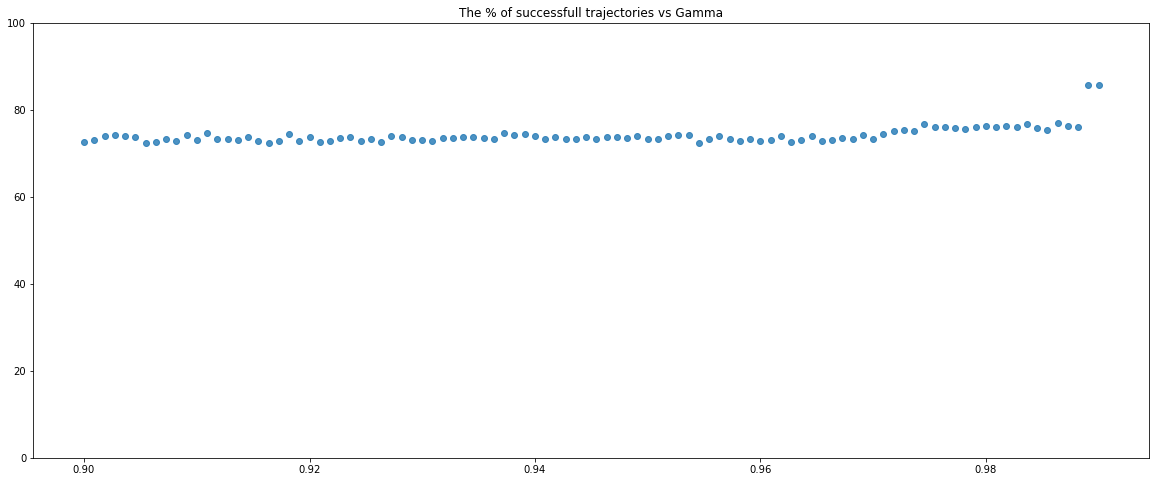

In [74]:
# g, sucess, fail, sucess_len, fail_len
plt.figure(figsize=(20,8))
plt.ylim((0,100))
plt.scatter(exps_short[::,0],exps_short[::,1]*100, alpha=0.8)
plt.title('The % of successfull trajectories vs Gamma')

In [90]:
gammas = np.linspace(0.988,0.999, num=100)
gammas

array([0.988     , 0.98811111, 0.98822222, 0.98833333, 0.98844444,
       0.98855556, 0.98866667, 0.98877778, 0.98888889, 0.989     ,
       0.98911111, 0.98922222, 0.98933333, 0.98944444, 0.98955556,
       0.98966667, 0.98977778, 0.98988889, 0.99      , 0.99011111,
       0.99022222, 0.99033333, 0.99044444, 0.99055556, 0.99066667,
       0.99077778, 0.99088889, 0.991     , 0.99111111, 0.99122222,
       0.99133333, 0.99144444, 0.99155556, 0.99166667, 0.99177778,
       0.99188889, 0.992     , 0.99211111, 0.99222222, 0.99233333,
       0.99244444, 0.99255556, 0.99266667, 0.99277778, 0.99288889,
       0.993     , 0.99311111, 0.99322222, 0.99333333, 0.99344444,
       0.99355556, 0.99366667, 0.99377778, 0.99388889, 0.994     ,
       0.99411111, 0.99422222, 0.99433333, 0.99444444, 0.99455556,
       0.99466667, 0.99477778, 0.99488889, 0.995     , 0.99511111,
       0.99522222, 0.99533333, 0.99544444, 0.99555556, 0.99566667,
       0.99577778, 0.99588889, 0.996     , 0.99611111, 0.99622

In [91]:
NN = 5000
L = 100
K = 100
exps_short_988_999 = experiments(L, K, NN, gammas)

/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


gammas:   0%|          | 0/100 [00:00<?, ?it/s]

train:   0%|          | 0/100 [00:00<?, ?it/s]

test:   0%|          | 0/5000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'The % of successfull trajectories vs Gamma')

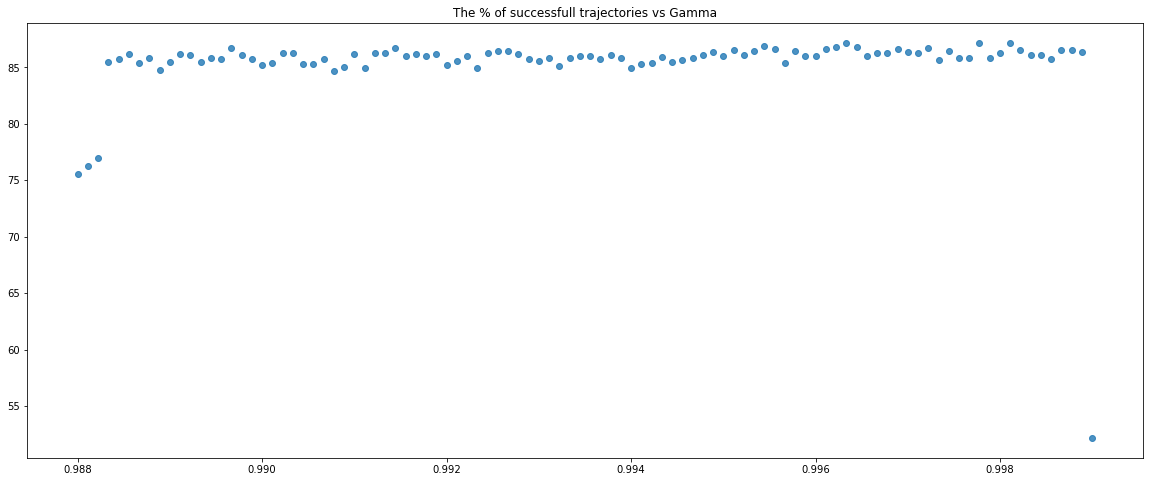

In [99]:
plt.figure(figsize=(20,8))
# plt.ylim((0,100))
plt.scatter(exps_short_988_999[::,0],exps_short_988_999[::,1]*100, alpha=0.8)
plt.title('The % of successfull trajectories vs Gamma')

In [107]:
import numpy as np
from bayes_opt import BayesianOptimization

L = 100
K = 100
NN = 5000
tqdm_train = tqdm.tqdm_notebook(total=K, desc='train', position=1)
tqdm_test  = tqdm.tqdm_notebook(total=NN, desc='test', position=2)

# Define the objective function for the MDP
def objective(gamma, K, L):
    # Train the MDP using the specified learning rate and discount factor
    policy = train_MDP(int(L), int(K), gamma, tqdm_train)

    # Evaluate the performance of the trained MDP on a validation dataset
    rewards, steps = test_MDP(policy, NN,  tqdm_test)
    g, sucess, fail, sucess_len, fail_len = stats(gamma, rewards, steps)
    # Return the performance of the MDP as the objective value
    return sucess

# Define the bounds of the hyperparameters
bounds = {'gamma': (0.01, 0.999), 'K':(1,100), 'L':(1,100)}

# Initialize the Bayesian optimization algorithm
bo = BayesianOptimization(objective, bounds)

# Run the optimization process for a maximum of 50 iterations
bo.maximize(n_iter=100)

# Print the hyperparameters that resulted in the best performance
print(bo.res['max'])

/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


train:   0%|          | 0/100 [00:00<?, ?it/s]

test:   0%|          | 0/5000 [00:00<?, ?it/s]

|   iter    |  target   |     K     |     L     |   gamma   |
-------------------------------------------------------------
| 1         | 0.7366    | 18.48     | 57.6      | 0.5167    |
| 2         | 0.8566    | 35.97     | 34.69     | 0.993     |
| 3         | 0.751     | 85.66     | 42.47     | 0.8384    |
| 4         | 0.7336    | 90.42     | 86.61     | 0.4754    |
| 5         | 0.7288    | 74.32     | 59.43     | 0.08711   |
| 6         | 0.7358    | 34.89     | 34.47     | 0.9194    |
| 7         | 0.717     | 83.65     | 37.56     | 0.6042    |
| 8         | 0.725     | 35.98     | 34.8      | 0.8918    |
| 9         | 0.727     | 60.68     | 52.89     | 0.3892    |
| 10        | 0.7418    | 44.5      | 54.81     | 0.5549    |
| 11        | 0.7464    | 50.83     | 85.6      | 0.1489    |
| 12        | 0.7266    | 46.67     | 4.396     | 0.8716    |
| 13        | 0.7356    | 33.28     | 82.39     | 0.8036    |
| 14        | 0.7326    | 27.87     | 40.23     | 0.3575    |
| 15    

| 81        | 0.7358    | 29.61     | 98.37     | 0.8581    |
| 82        | 0.7346    | 47.57     | 90.91     | 0.9302    |
| 83        | 0.7324    | 43.39     | 7.396     | 0.07771   |
| 84        | 0.7442    | 96.91     | 13.56     | 0.4716    |
| 85        | 0.7354    | 76.81     | 55.79     | 0.9124    |
| 86        | 0.7312    | 29.44     | 41.92     | 0.6783    |
| 87        | 0.734     | 39.4      | 99.7      | 0.662     |
| 88        | 0.7388    | 53.2      | 60.79     | 0.5466    |
| 89        | 0.7284    | 93.73     | 59.49     | 0.9335    |
| 90        | 0.7348    | 30.22     | 63.65     | 0.181     |
| 91        | 0.7344    | 83.01     | 34.67     | 0.5146    |
| 92        | 0.7346    | 56.28     | 31.52     | 0.4866    |
| 93        | 0.7412    | 48.61     | 20.1      | 0.7553    |
| 94        | 0.7308    | 12.52     | 62.95     | 0.8133    |
| 95        | 0.731     | 61.46     | 64.04     | 0.2358    |
| 96        | 0.737     | 38.47     | 19.58     | 0.3849    |
| 97    

TypeError: list indices must be integers or slices, not str

In [110]:
import numpy as np
from bayes_opt import BayesianOptimization

L = 100
K = 100
NN = 5000
tqdm_train = tqdm.tqdm_notebook(total=K, desc='train', position=1)
tqdm_test  = tqdm.tqdm_notebook(total=NN, desc='test', position=2)

# Define the objective function for the MDP
def objective(K, L):
    # Train the MDP using the specified learning rate and discount factor
    policy = train_MDP(int(L), int(K),  0.9884, tqdm_train)

    # Evaluate the performance of the trained MDP on a validation dataset
    rewards, steps = test_MDP(policy, NN,  tqdm_test)
    g, sucess, fail, sucess_len, fail_len = stats(gamma, rewards, steps)
    # Return the performance of the MDP as the objective value
    return sucess

# Define the bounds of the hyperparameters
bounds = {'K':(1,100), 'L':(1,100)}

# Initialize the Bayesian optimization algorithm
bo = BayesianOptimization(objective, bounds)

# Run the optimization process for a maximum of 50 iterations
bo.maximize(n_iter=50)

# Print the hyperparameters that resulted in the best performance
# print(bo.res['max'])

/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


train:   0%|          | 0/100 [00:00<?, ?it/s]

test:   0%|          | 0/5000 [00:00<?, ?it/s]

|   iter    |  target   |     K     |     L     |
-------------------------------------------------
| 1         | 0.7488    | 24.85     | 1.844     |
| 2         | 0.8544    | 84.82     | 92.81     |
| 3         | 0.8446    | 48.5      | 32.91     |
| 4         | 0.8558    | 72.3      | 21.0      |
| 5         | 0.8562    | 47.0      | 10.92     |
| 6         | 0.854     | 48.23     | 9.875     |
| 7         | 0.853     | 79.1      | 42.65     |
| 8         | 0.8566    | 82.25     | 68.98     |
| 9         | 0.8672    | 63.07     | 81.59     |
| 10        | 0.8612    | 58.36     | 62.86     |
| 11        | 0.8484    | 41.6      | 80.78     |
| 12        | 0.8514    | 58.31     | 99.66     |
| 13        | 0.8516    | 99.18     | 19.64     |
| 14        | 0.7244    | 1.808     | 98.95     |
| 15        | 0.8612    | 100.0     | 52.06     |
| 16        | 0.7288    | 1.0       | 45.29     |
| 17        | 0.8586    | 90.08     | 1.003     |
| 18        | 0.8624    | 100.0     | 100.0     |


In [109]:
t = 0
max_params = None
for res in bo.res:
    if (res['target']>t):
        max_params = res
        t = res['target']
print(max_params)

{'target': 0.861, 'params': {'K': 72.6573029392998, 'L': 36.01783117565698, 'gamma': 0.9940136717034753}}


In [47]:
dones = np.array([(r['target'], r['params']['gamma']) for r in bo.res])

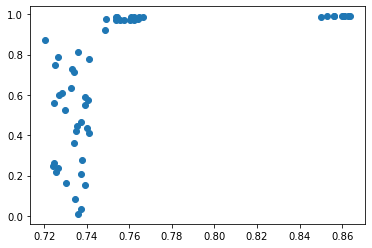

In [50]:
plt.scatter(dones[::,0], dones[::,1])

In [297]:
exps

array([[ 0.        ,  0.0147    ,  0.9853    , 11.96598639,  6.61230082],
       [ 0.11111111,  0.0142    ,  0.9858    , 12.92957746,  6.57892067],
       [ 0.22222222,  0.0139    ,  0.9861    , 12.33093525,  6.65175946],
       [ 0.33333333,  0.0157    ,  0.9843    , 12.21656051,  6.63679772],
       [ 0.44444444,  0.0155    ,  0.9845    , 11.75483871,  6.5523616 ],
       [ 0.55555556,  0.0167    ,  0.9833    , 13.4251497 ,  6.5096105 ],
       [ 0.66666667,  0.0151    ,  0.9849    , 11.96688742,  6.66422987],
       [ 0.77777778,  0.0148    ,  0.9852    , 12.38513514,  6.60535932],
       [ 0.88888889,  0.0156    ,  0.9844    , 12.30128205,  6.51787891],
       [ 1.        ,  0.014     ,  0.986     , 12.40714286,  6.64371197]])

In [230]:
len(exps)

3

In [246]:
g, r, s = exps[0]

ValueError: too many values to unpack (expected 3)

In [233]:
g

0.0

In [245]:
stats(g, r, s)

(0.012, 0.988, 11.666666666666666, 6.618421052631579)

In [158]:
def test_policy(policy):
    total_reward = 0
    state = env.reset()
    for i in range(100):
        possible_actions = list(sorted(env.get_possible_actions(state)))
#         print(possible_actions)
        state_y, state_x = state
        actions_distr = policy[state_y][state_x]

        action = np.random.choice(possible_actions,p=actions_distr)
        state, reward, done, _ = env.step(action)
#         print(state, reward, done, _,action, actions_distr)
#         env.render()
        total_reward += reward

        if done: break
    return total_reward, i

In [126]:
NN = 10000
runs = [run_test()for _ in tqdm.tqdm(range(NN))]
runs = np.array(runs)

100%|██████████| 10000/10000 [00:06<00:00, 1459.44it/s]


In [114]:
import matplotlib.pyplot as plt

/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
success = np.sum(runs[::,0]==1.)/NN
fail = 1-success
print(success, fail)

0.7276 0.2724


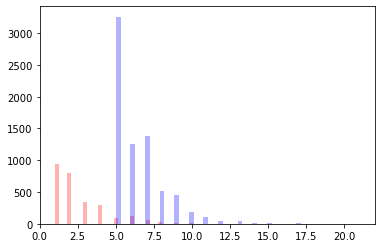

In [128]:
plt.hist(runs[runs[::,0]==0.][::,1], color='red' , alpha=0.3, bins=50)
plt.hist(runs[runs[::,0]==1.][::,1], color='blue', alpha=0.3, bins=50)
plt.show()

In [40]:
total_reward

1.0

In [61]:
float('Inf')

inf

In [44]:
from Frozen_Lake import FrozenLakeEnv
import numpy as np
import time

env = FrozenLakeEnv()

def init_policy():
    policy = {}
    for state in env.get_all_states():
        policy[state] = {}
        for action in env.get_possible_actions(state):
            policy[state][action] = 1 / len(env.get_possible_actions(state))
    return policy

def policy_evaluation_step(policy, values, gamma):
    q_values = get_q_values(values, gamma)
    
    new_values = {}
    for state in env.get_all_states():
        new_values[state] = 0
        for action in env.get_possible_actions(state):
            new_values[state] += policy[state][action] * q_values[state][action]
    
    return new_values

def init_values():
    return {state: 0 for state in env.get_all_states()}

def get_q_values(values, gamma):
    q_values = {}
    for state in env.get_all_states():
        q_values[state] = {}
        for action in env.get_possible_actions(state):
            q_values[state][action] = 0
            for next_state in env.get_next_states(state, action):
                reward = env.get_reward(state, action, next_state)
                transition_prob = env.get_transition_prob(state, action, next_state)
                next_value = values[next_state]
                q_values[state][action] += transition_prob * (reward + gamma * next_value)
    return q_values

def policy_evaluation(policy, gamma, evaluation_step_n):
    values = init_values()
    for _ in range(evaluation_step_n):
        values = policy_evaluation_step(policy, values, gamma)
    q_values = get_q_values(values, gamma)
    return q_values

def policy_improvement(q_values):
    new_policy = {}
    for state in env.get_all_states():
        new_policy[state] = {}
        max_action = None
        max_q_value = float('-inf')
        for action in env.get_possible_actions(state):
            if q_values[state][action] > max_q_value:
                max_q_value = q_values[state][action]
                max_action = action
        for action in env.get_possible_actions(state):
            new_policy[state][action] = 1 if action == max_action else 0
    return new_policy


iteration_n = 100
evaluation_step_n = 100
gamma = 0.9

policy = init_policy()
for k in tqdm.tqdm(range(iteration_n), position=0):
    
    q_values = policy_evaluation(policy, gamma, evaluation_step_n)
    policy = policy_improvement(q_values)
    

total_reward = 0
state = env.reset()
for _ in range(100):
    action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
    state, reward, done, _ = env.step(action)
    
    time.sleep(1)
    env.render()
    
    total_reward += reward
    
    if done or env.is_terminal(state):
        break

print(f'total reward = {total_reward}')

100%|██████████| 100/100 [00:05<00:00, 19.55it/s]


SFFF
*HFH
FFFH
HFFG

SFFF
FHFH
*FFH
HFFG

SFFF
FHFH
F*FH
HFFG

SFFF
FHFH
FFFH
H*FG

SFFF
FHFH
FFFH
HF*G

SFFF
FHFH
FFFH
HFF*

total reward = 1.0


In [49]:
plc = np.zeros((4,4,4))
for (y,x),a  in policy.items():
    for k,v in a.items():
        plc[y][x][actions_dict[k]] = v

/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
